In [12]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/ARIMA_Models_in_Python/datasets/'
import pandas as pd
import numpy as np

from statsmodels.tsa.arima.model import ARIMA

# Ignore warnings
import warnings

warnings.filterwarnings("ignore")


In [7]:
df = pd.read_csv(path_data+'df.csv', index_col='Unnamed: 0')
display(df.head())

,y
2013-01-01,1.624345
2013-01-02,-0.936625
2013-01-03,0.081483
2013-01-04,-0.663558
2013-01-05,0.738023


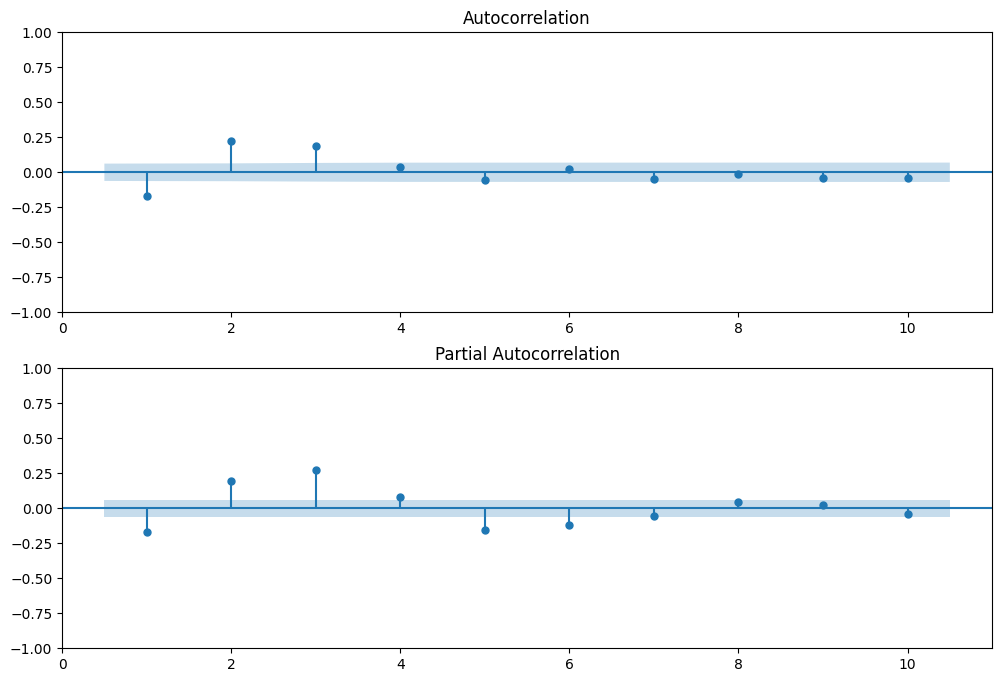

'\nPerfect! The ACF cuts off after 3 lags and the PACF tails off.\n'

In [8]:
# exercise 01

"""
AR or MA

In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our predictions.

Remember that for different types of models we expect the following behavior in the ACF and PACF:
	AR(p)	MA(q)	ARMA(p,q)
ACF	Tails off	Cuts off after lag q	Tails off
PACF	Cuts off after lag p	Tails off	Tails off

A time series with unknown properties, df is available for you in your environment.
"""

# Instructions

"""

    Import the plot_acf and plot_pacf functions from statsmodels.
    Plot the ACF and the PACF for the series df for the first 10 lags but not the zeroth lag.
---
Question

Based on the ACF and PACF plots, what kind of model is this?
(MA(3))
"""

# solution

# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2)

plt.show()

#----------------------------------#

# Conclusion

"""
Perfect! The ACF cuts off after 3 lags and the PACF tails off.
"""

In [10]:
earthquake = pd.read_csv(path_data+'earthquakes.csv', index_col='date', parse_dates=True).drop('Year', axis=1)
earthquake.head()

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0


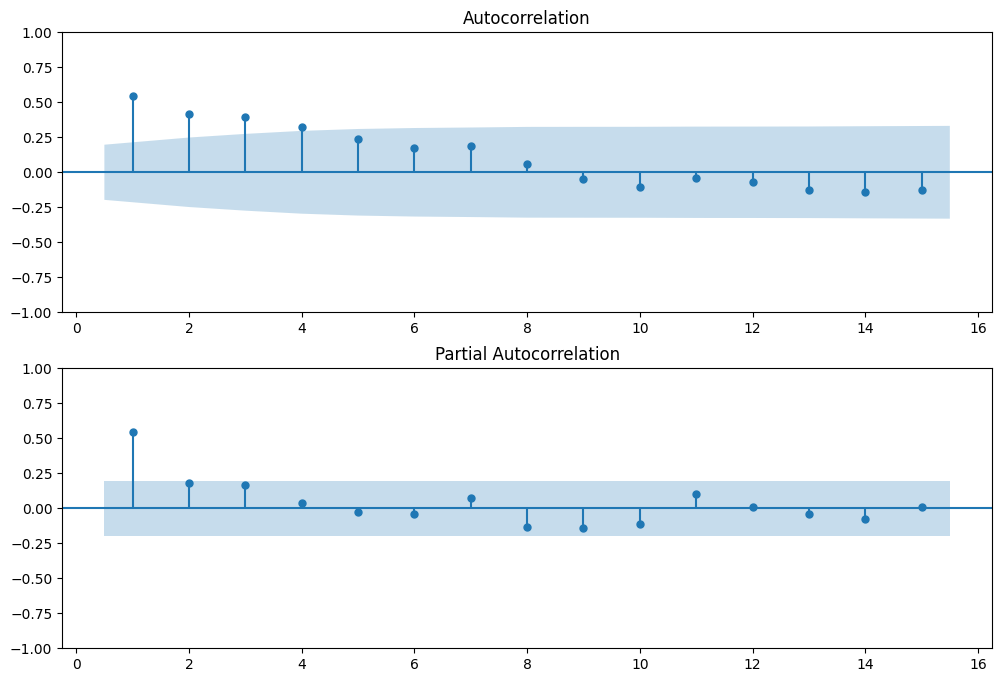

'\nIn this exercise you just went the whole way from raw data to the optimal trained model! Amazing!\n'

In [14]:
# exercise 02

"""
Order of earthquakes

In this exercise you will use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.
	AR(p) 	MA(q) 	ARMA(p,q)
ACF 	Tails off 	Cuts off after lag q 	Tails off
PACF 	Cuts off after lag p 	Tails off 	Tails off

The earthquakes time series earthquake, the plot_acf(), and plot_pacf() functions, and the ARIMA model class are available in your environment.
"""

# Instructions

"""

    Plot the ACF and the PACF of the earthquakes time series earthquake up to a lag of 15 steps and don't plot the zeroth lag.
---
Question

Look at the ACF/PACF plots and the table above.

What is the most appropriate model for the earthquake data?
(AR(1))
---

    Create an appropriate model and train it on the earthquakes time series.

"""

# solution

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

#----------------------------------#

# Instantiate model
model = ARIMA(earthquake, order=(1,0,0))

# Train model
results = model.fit()


#----------------------------------#


# Conclusion

"""
In this exercise you just went the whole way from raw data to the optimal trained model! Amazing!
"""

In [16]:
df = pd.read_csv(path_data+'df2.csv', index_col='Unnamed: 0')
display(df.head())

,y
2013-01-01,1.624345
2013-01-02,0.525285
2013-01-03,-0.940158
2013-01-04,-1.671342
2013-01-05,0.122849


In [17]:
# exercise 03

"""
Searching over model order

In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

The ARIMA model class and the time series DataFrame df are available in your environment.
"""

# Instructions

"""

    Loop over values of p from 0-2.
    Loop over values of q from 0-2.
    Train and fit an ARMA(p,q) model.
    Append a tuple of (p,q, AIC value, BIC value) to order_aic_bic.

"""

# solution

# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = ARIMA(df, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q, results.aic, results.bic))

#----------------------------------#

# Conclusion

"""
Fantastic! You built 9 models in just a few seconds! In the next exercise you will evaluate the results to choose the best model.
"""

'\nFantastic! You built 9 models in just a few seconds! In the next exercise you will evaluate the results to choose the best model.\n'

In [18]:
# exercise 04

"""
Choosing order with AIC and BIC

Now that you have performed a search over many model orders, you will evaluate your results to find the best model order.

The list of tuples of (p,q, AIC value, BIC value) that you created in the last exercise, order_aic_bic, is available in your environment. pandas has also been imported as pd.
"""

# Instructions

"""

    Create a DataFrame to hold the order search information in the order_aic_bic list. Give it the column names ['p', 'q', 'AIC', 'BIC'].
    Print the DataFrame in order of increasing AIC and then BIC.
---
Question

Which of the following models is the best fit?
(ARMA(2,1))
"""

# solution

# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

#----------------------------------#

# Conclusion

"""
Perfect! This time AIC and BIC favored the same model, but this won't always be the case.
"""

   p  q          AIC          BIC
7  2  1  1414.536020  1435.609061
8  2  2  1416.431334  1441.718983
5  1  2  1417.892129  1438.965169
6  2  0  1419.066942  1435.925374
2  0  2  1426.020087  1442.878519
4  1  1  1428.927060  1445.785492
1  0  1  1430.656368  1443.300193
3  1  0  1498.437872  1511.081696
0  0  0  1615.197537  1623.626753
   p  q          AIC          BIC
7  2  1  1414.536020  1435.609061
6  2  0  1419.066942  1435.925374
5  1  2  1417.892129  1438.965169
8  2  2  1416.431334  1441.718983
2  0  2  1426.020087  1442.878519
1  0  1  1430.656368  1443.300193
4  1  1  1428.927060  1445.785492
3  1  0  1498.437872  1511.081696
0  0  0  1615.197537  1623.626753


"\nPerfect! This time AIC and BIC favored the same model, but this won't always be the case.\n"

In [19]:
# exercise 05

"""
AIC and BIC vs ACF and PACF

In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results. The ACF and PACF plots for this dataset are shown below.

The ARIMA model class and the time series DataFrame earthquake are available in your environment.
"""

# Instructions

"""

    Loop over orders of p and q between 0 and 2.
    Inside the loop try to fit an ARMA(p,q) to earthquake on each loop.
    Print p and q alongside AIC and BIC in each loop.
    If the model fitting procedure fails print p, q, None, None.

"""

# solution

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = ARIMA(earthquake, order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)     

#----------------------------------#

# Conclusion

"""
Super! If you look at your printed results you will see that the AIC and BIC both actually favor an ARMA(1,1) model. This isn't what you predicted from the ACF and PACF but notice that the lag 2-3 PACF values are very close to significant, so the ACF/PACF are close to those of an ARMA(p,q) model.
"""

0 0 676.5443594984636 681.7345991987328
0 1 654.8468586200252 662.6322181704289
0 2 651.7332270519036 662.1137064524419
1 0 643.9676770992027 651.7530366496064
1 1 640.4562835911977 650.836762991736
1 2 642.3808673565686 655.3564666072416
2 0 642.7338539385339 653.1143333390722
2 1 647.4406643960186 660.4162636466916
2 2 642.4685896287774 658.039308729585


"\nSuper! If you look at your printed results you will see that the AIC and BIC both actually favor an ARMA(1,1) model. This isn't what you predicted from the ACF and PACF but notice that the lag 2-3 PACF values are very close to significant, so the ACF/PACF are close to those of an ARMA(p,q) model.\n"

4.56898829488138


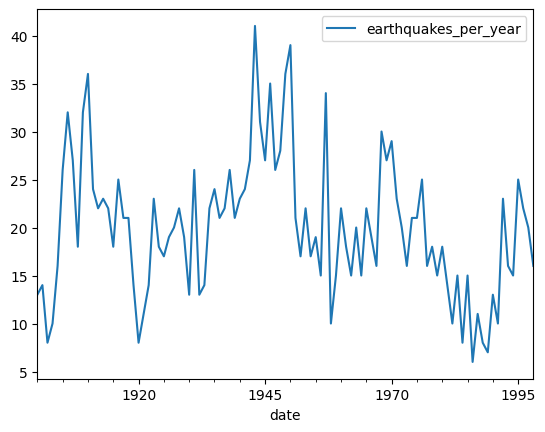

'\nGreat! Your mean error is about 4-5 earthquakes per year. You have plotted the time series so that you can see how the MAE compares to the spread of the time series. Considering that there are about 20 earthquakes per year that is not too bad.\n'

In [20]:
# exercise 06

"""
Mean absolute error

Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

numpy has been imported into your environment as np and the earthquakes time series is available for you as earthquake.
"""

# Instructions

"""

    Use np functions to calculate the Mean Absolute Error (MAE) of the .resid attribute of the results object.
    Print the MAE.
    Use the DataFrame's .plot() method with no arguments to plot the earthquake time series.

"""

# solution

# Fit model
model = ARIMA(earthquake, order=(1,0,1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot()
plt.show()

#----------------------------------#

# Conclusion

"""
Great! Your mean error is about 4-5 earthquakes per year. You have plotted the time series so that you can see how the MAE compares to the spread of the time series. Considering that there are about 20 earthquakes per year that is not too bad.
"""

In [21]:
df = pd.read_csv(path_data+'df3.csv', index_col='Unnamed: 0')
display(df.head())

,y
2013-01-01,1.624345
2013-01-02,-0.936625
2013-01-03,-0.113438
2013-01-04,-1.762924
2013-01-05,1.362968


In [22]:
# exercise 07

"""
Diagnostic summary statistics

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

Here is a reminder of the tests in the model summary:
Test 	Null hypothesis 	P-value name
Ljung-Box 	There are no correlations in the residual
	Prob(Q)
Jarque-Bera 	The residuals are normally distributed 	Prob(JB)

An unknown time series df and the ARIMA model class are available for you in your environment.
"""

# Instructions

"""

    Fit an ARMA(3,1) model to the time series df.
    Print the model summary.
---
Question

Based on the outcomes of the tests in the summary, which of the following is correct about the residuals of results1?
(Not correlated and normaly distributed)
---

    Fit an AR(2) model to the time series df.
    Print the model summary.
---
Question

Based on the outcomes of the tests in the summary, which of the following is correct about the residuals of results2?
(Correlated and normaly distributed)
"""

# solution

# Create and fit model
model1 = ARIMA(df, order=(3,0,1))
results1 = model1.fit()

# Print summary
print(results1.summary())

#----------------------------------#

# Create and fit model
model2 = ARIMA(df, order=(2,0,0))
results2 = model2.fit()

# Print summary
print(results2.summary())

#----------------------------------#

# Conclusion

"""
Great. Our model didn't pull out all the correlations in the data. This suggests we could make it better. Perhaps by increasing the model order.
"""

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -555.394
Date:                Thu, 31 Aug 2023   AIC                           1122.787
Time:                        10:19:03   BIC                           1146.736
Sample:                    01-01-2013   HQIC                          1132.272
                         - 02-04-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0314      0.030      1.060      0.289      -0.027       0.090
ar.L1          0.0163      0.109      0.150      0.881      -0.197       0.230
ar.L2          0.2159      0.052      4.179      0.0

"\nGreat. Our model didn't pull out all the correlations in the data. This suggests we could make it better. Perhaps by increasing the model order.\n"

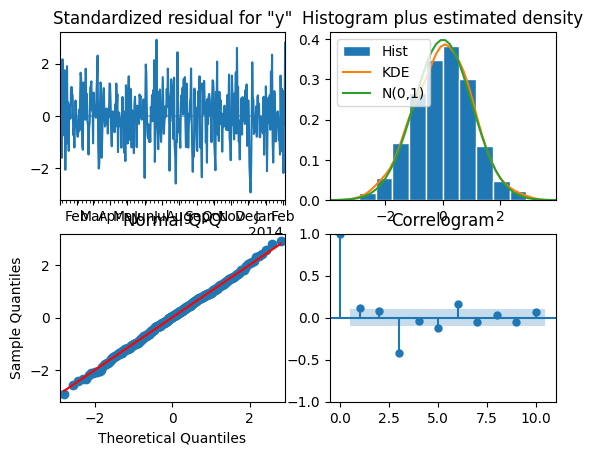

'\nGreat! The Q-Q plot deviates significantly from a straight line! This suggests the model could be improved.\n'

In [23]:
# exercise 08

"""
Plot diagnostics

It is important to know when you need to go back to the drawing board in model design. In this exercise you will use 4 common plots to decide whether a model is a good fit to some data.

Here is a reminder of what you would like to see in each of the plots for a model that fits well:
Test |	Good fit
Standardized residual |	There are no obvious patterns in the residuals
Histogram plus kde estimate |	The KDE curve should be very similar to the normal distribution
Normal Q-Q |	Most of the data points should lie on the straight line
Correlogram |	95% of correlations for lag greater than zero should not be significant

An unknown time series df and the ARIMA model class are available for you in your environment.-
"""

# Instructions

"""

    Fit an ARIMA(1,1,1) model to the time series df.
    Create the 4 diagnostic plots.
---
Question

    Do these plots suggest that any of these are true about the model fit.
(None)
---
Question

Below are 4 different diagnostic plots, each of the 4 plots comes from a different fitted model. 
(Normal Q-Q)
"""

# solution

# Create and fit model
model = ARIMA(df, order=(1,1,1))
results = model.fit()

# Create the 4 diagnostics plots
results.plot_diagnostics()
plt.show()

#----------------------------------#

# Conclusion

"""
Great! The Q-Q plot deviates significantly from a straight line! This suggests the model could be improved.
"""

In [25]:
savings = pd.read_csv(path_data+'savings.csv', index_col='date', parse_dates=True)
savings.head()

,savings
date,
1955-01-01,4.9
1955-04-01,5.2
1955-07-01,5.7
1955-10-01,5.7
1956-01-01,6.2


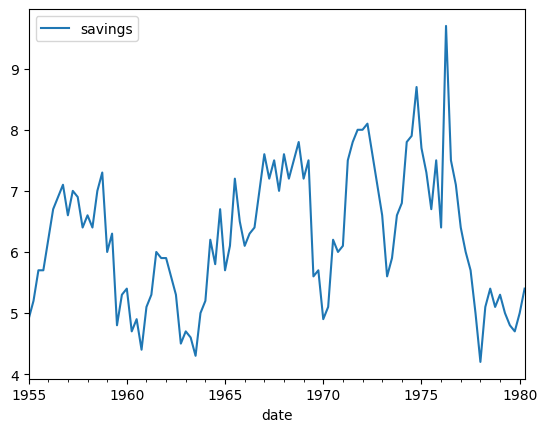

-3.185899096242141
0.020815541644114092


'\nGreat! The Dicky-Fuller test says that the series is stationary. You can confirm this when you look at the plot. There is one fairly high value is 1976 which might be anomalous, but you will leave that for now.\n'

In [26]:
# exercise 09

"""
Identification

In the following exercises you will apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts.

You will be using a new time series. This is the personal savings as % of disposable income 1955-1979 in the US.

The first step of the Box-Jenkins methodology is Identification. In this exercise you will use the tools at your disposal to test whether this new time series is stationary.

The time series has been loaded in as a DataFrame savings and the adfuller() function has been imported.
"""

# Instructions

"""

    Plot the time series using the DataFrame's .plot() method.
    Apply the Dicky-Fuller test to the 'savings' column of the savings DataFrame and assign the test outcome to result.
    Print the Dicky-Fuller test statistics and the associated p-value.

"""

# solution

from statsmodels.tsa.stattools import adfuller

# Plot time series
savings.plot()
plt.show()

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

#----------------------------------#

# Conclusion

"""
Great! The Dicky-Fuller test says that the series is stationary. You can confirm this when you look at the plot. There is one fairly high value is 1976 which might be anomalous, but you will leave that for now.
"""

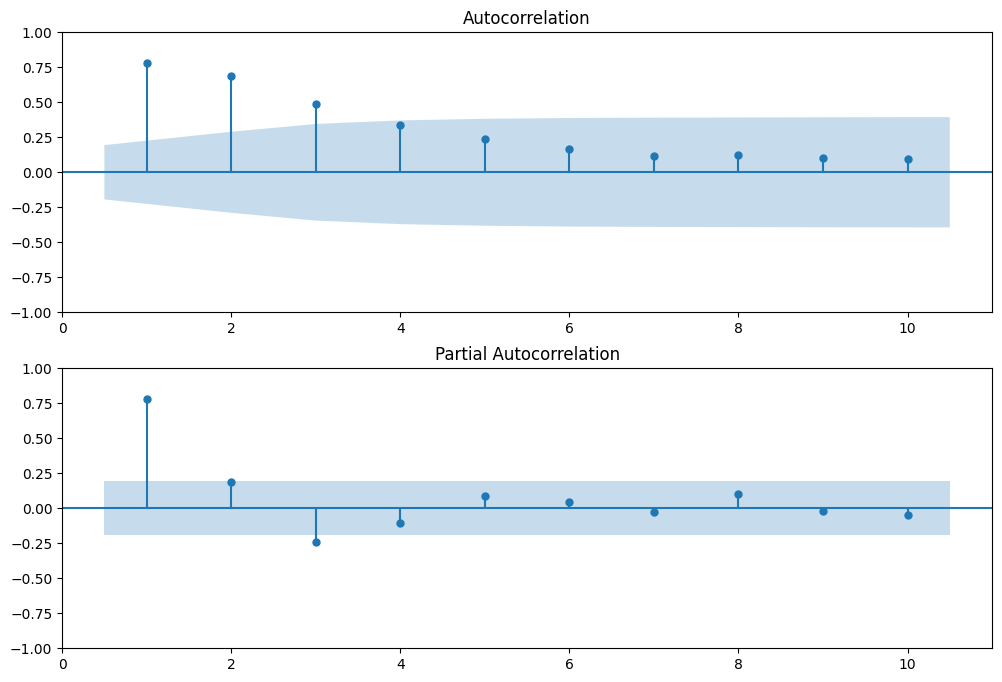

'\nStep one complete! The ACF and the PACF are a little inconclusive for this ones. The ACF tails off nicely but the PACF might be tailing off or it might be dropping off. So it could be an ARMA(p,q) model or a AR(p) model.\n'

In [27]:
# exercise 10

"""
Identification II

You learned that the savings time series is stationary without differencing. Now that you have this information you can try and identify what order of model will be the best fit.

The plot_acf() and the plot_pacf() functions have been imported and the time series has been loaded into the DataFrame savings.
"""

# Instructions

"""

    Make a plot of the ACF, for lags 1-10 and plot it on axis ax1.
    Do the same for the PACF.

"""

# solution

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2)

plt.show()

#----------------------------------#

# Conclusion

"""
Step one complete! The ACF and the PACF are a little inconclusive for this ones. The ACF tails off nicely but the PACF might be tailing off or it might be dropping off. So it could be an ARMA(p,q) model or a AR(p) model.
"""

In [28]:
# exercise 11

"""
Estimation

In the last exercise, the ACF and PACF were a little inconclusive. The results suggest your data could be an ARMA(p,q) model or could be an imperfect AR(3) model. In this exercise you will search over models over some model orders to find the best one according to AIC.

The time series savings has been loaded and the ARIMA class has been imported into your environment.
"""

# Instructions

"""

    Loop over values of p from 0 to 3 and values of q from 0 to 3.
    Inside the loop, create an ARMA(p,q) model.
    Then fit the model to the time series savings.
    At the end of each loop print the values of p and q and the AIC and BIC.

"""

# solution

# Loop over p values from 0-3
for p in range(0,4):
  
  # Loop over q values from 0-3
    for q in range(0,4):
      try:
        # Create and fit ARMA(p,q) model
        model = ARIMA(savings, order=(p,0,q))
        results = model.fit()
        
        # Print p, q, AIC, BIC
        print(p,q, results.aic,results.bic)
        
      except:
        print(p, q, None, None)

#----------------------------------#

# Conclusion

"""
Step two complete! You didn't store and sort your results this time. But the AIC and BIC both picked the ARMA(1,2) model as the best and the AR(3) model as the second best.
"""

0 0 313.6028657381061 318.85281136467466
0 1 267.0697098084469 274.9446282482997
0 2 232.16782677363798 242.66771802677508
0 3 217.59720509753367 230.72206916395504
1 0 216.203479563773 224.0783980036258
1 1 215.7003889529165 226.2002802060536
1 2 207.65298384447473 220.77784791089607
1 3 209.57498315813854 225.32482003784418
2 0 213.97232199692382 224.47221325006092
2 1 213.4303586787603 226.55522274518165
2 2 209.57903144324098 225.32886832294662
2 3 211.57498195129355 229.94979164428344
3 0 209.5449293671733 222.66979343359463
3 1 210.8214728490305 226.57130972873614
3 2 211.45759548497836 229.83240517796824
3 3 213.35650857580032 234.35629108207448


"\nStep two complete! You didn't store and sort your results this time. But the AIC and BIC both picked the ARMA(1,2) model as the best and the AR(3) model as the second best.\n"

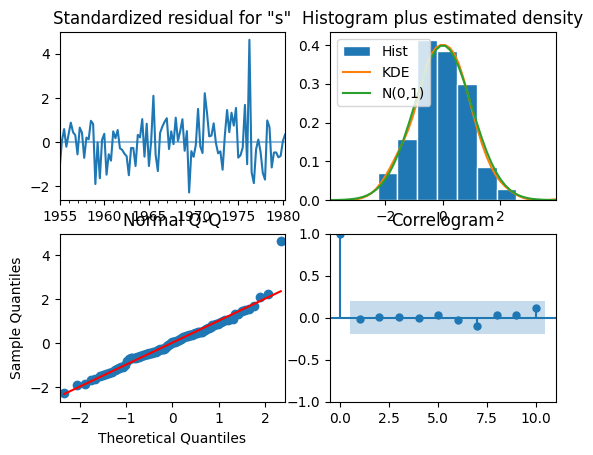

                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -98.826
Date:                Thu, 31 Aug 2023   AIC                            207.653
Time:                        10:41:08   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1949      0.323     19.169      0.000       5.561       6.828
ar.L1          0.7284      0.111      6.534      0.000       0.510       0.947
ma.L1         -0.0538      0.145     -0.370      0.7

'\nGreat! The JB p-value is zero, which means you should reject the null hypothesis that the residuals are normally distributed. However, the histogram and Q-Q plots show that the residuals look normal. This time the JB value was thrown off by the one outlying point in the time series. In this case, you could go back and apply some transformation to remove this outlier or you probably just continue to the production stage.\n'

In [29]:
# exercise 12

"""
Diagnostics

You have arrived at the model diagnostic stage. So far you have found that the initial time series was stationary, but may have one outlying point. You identified promising model orders using the ACF and PACF and confirmed these insights by training a lot of models and using the AIC and BIC.

You found that the ARMA(1,2) model was the best fit to our data and now you want to check over the predictions it makes before you would move it into production.

The time series savings has been loaded and the ARIMA class has been imported into your environment.
"""

# Instructions

"""


    Retrain the ARMA(1,2) model on the time series, setting the trend to constant.
    Create the 4 standard diagnostics plots.
    Print the model residual summary statistics.


"""

# solution

# Create and fit model
model = ARIMA(savings, order=(1,0,2))
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

# Print summary
print(results.summary())

#----------------------------------#

# Conclusion

"""
Great! The JB p-value is zero, which means you should reject the null hypothesis that the residuals are normally distributed. However, the histogram and Q-Q plots show that the residuals look normal. This time the JB value was thrown off by the one outlying point in the time series. In this case, you could go back and apply some transformation to remove this outlier or you probably just continue to the production stage.
"""